In [5]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


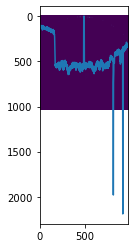

In [6]:
img = Image.open(r"C:\Users\Bradley\Videos\New folder\AgBH_cali_5m_13.5kev_2_1961.7s_RH661.032_x0.300_th0.000_5.00s_458795_waxs.tiff")
#for the image you just insert the file path. On Windows 10 this is found by left clicking once on an image and then going above it and finding where it says "copy path"
#take the path and insert it (with the quotations included) after r into the Image.open(r) function
#so like "Image.open(r"C:\filename")
img1 = img.convert('I') # 'I' : 32-bit integer pixels
img1.show()

data = ( np.copy( np.asarray(img1) ) ).astype(float) #I am unsure what data is actually getting and what the peaks are
plt.imshow(data)
plt.plot(data[0,:])

In [7]:
smallest_num=2.2250738585072014*10**(-306) #2.2250738585072014*10**(-308) is the smallest positive number in python by I will just increase this number by 100 times. 
#I don't want for the logarithm to have issue computing with a number so close to the minnimum.
logcorrection=-np.min(img) #there are gaps in the image so np.min(img) is negative. I assume it will be negative for all images. If it positive there is a chance it makes the log go below zero.
data_log = np.log10(data+logcorrection+smallest_num) #np.min(img)=-2 so the lowest data point in the image (the 2d array representing the image values) is -2. If we add the opposite (2) and then a tiny bit more, it shifts to be in the domain.
#log base 10 has domain: x>0 for x in R so we want to add over 2 in order to plot. 
#I will go as close to 2 as possbile to minnimize the amount the graph is transformed from the orginal 
#(which we had certain values we couldn't plot so the whole thing wouldn't plot).

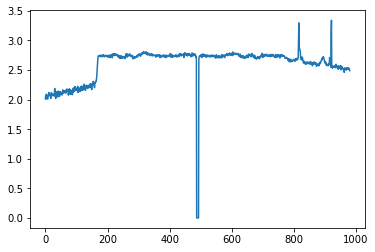

In [8]:
plt.plot(data_log[0,:]) #clearly a tiny gap where the data is missing. It is at instead of negative 2 because of our shift.

In [9]:
img2 = np.asarray(Image.open("/Users/Bradley/Videos/New folder/AgBH_cali_5m_13.5kev_2_1961.7s_RH661.032_x0.300_th0.000_5.00s_458795_waxs.tiff"))
# for numpy version of file all backslashes turned in forward slashes. Also no "r" and C: as shown in cell 1.

In [31]:
print(img2) #Each inner list represents a row. All the elements in the same positions in each inner array form a column
#repr() just gives a printable version of the object (the img2 array in this case)
print()
print("Row amount: "+str(len(img2))+" Column amount: "+str(len(img2[0]))) #len(img2[0]) used since it is rectangular
#amount of arrays in the 2D array- which should tell us the row number. The column number is also given. Basically the dimensions of our image.
#negative value are the missing parts of the image which have no intensity value. Also the image being put on my computer can slightly corrupt it so it makes more gaps and thus more negative values.

[[102 116 100 ... 322 314 306]
 [106 104 120 ... 343 331 307]
 [ 95 124 107 ... 383 334 281]
 ...
 [ -2  -2  -2 ... 153 188 176]
 [ -2  -2  -2 ... 160 159 161]
 [ -2  -2  -2 ... 182 147 155]]

Row amount: 1043 Column amount: 981


Max value is: 19746
Index of max value is: 676


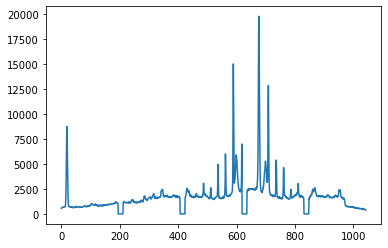

In [12]:
#example
plt.plot(img2[:,500]) #500th column of the array
#np.argmax(img2[:,500])
ii=np.argmax(img2[:,500])
ii #index of the max value in the 500th column of the array
maxval=img2[ii,500] #the peak value
print("Max value is: "+str(maxval)+"\nIndex of max value is: "+str(ii))


In [13]:
#example
x=img2[:,500]
a=x>7500 #tells you if the values are above this number. True or false so boolean.
a

array([False, False, False, ..., False, False, False])

C:\Users\Bradley\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Bradley\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Approximate horizontal (row) center: 553.8661526888493


C:\Users\Bradley\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Bradley\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Approximate vertical (column) center: 375.9626249495353


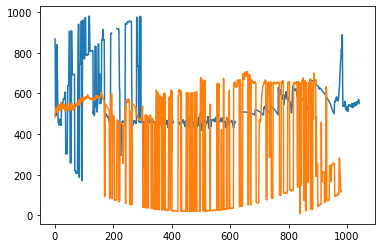

In [30]:
#lets find the max value in a row or column 1D array in order to find where the highest intensity value is. We can then get 85% (I may change this) of that value to look at other high values.
#These other high values can be used to get an idea of where the rings are (as we can get an average of their indices)

#got the max value in each row and column to compare with the other values in the same row or column.

#for rows
averages=np.array([])
higher_list=np.array([])
for a in range(len(img2)): #go through every row and note that img2[0] is the same size as every other row since our image is a rectangle
    index_max=np.argmax(img2[a]) #get the max value of the row's index
    valmax=img2[a][index_max] #get the actual max value in that row
    lowerbound=.85*valmax #we want to see where values above this are. The high intensity values. I chose a 15% threshold.
    for b in range (len(img2[a])): #go through each index of the row
        if img2[a][b]>lowerbound: #if the element is larger than our bound
            higher_list=np.append(higher_list,b) #get the indicies of the larger elements and add them all to a list
    
    averages=np.append(averages,np.mean(higher_list)) #the average of the larger elements (b) to find the center of high intensity spots (the avg index) on a singular row is added to a list of all them (for each row).
    higher_list=np.array([])

#len(averages)) is same length as the row number because each row has one average

print("Approximate horizontal (row) center: "+str(np.nanmean(averages))) #nanmean ignores nan values. nan means not a number. If we just do mean then we get nan.

plt.plot(averages)
    

#for columns
averages=np.array([])
higher_list=np.array([])
for c in range(len(img2[0])): #go through every column and note that img2[0] is the size of the number of columns.
    index_max=np.argmax(img2[:,c]) #get the max value of the column's index
    valmax=img2[:,c][index_max] #get the actual max value in that column. valmax=img2[[:,c] ,index_max] doesn't work
    lowerbound=.85*valmax #we want to see where values above this are. The high intensity values. I chose a 15% threshold.
    for d in range (len(img2[:,c])): #go through each index of the column
        if img2[:,c][d]>lowerbound: #if the element is larger than our bound
            higher_list=np.append(higher_list,d) #get the indicies of the larger elements and add them all to a list
    
    averages=np.append(averages,np.mean(higher_list)) #the average of the larger elements (b) to find the center of high intensity spots (the avg index) on a singular row is added to a list of all them (for each row).
    higher_list=np.array([])

#len(averages)) is same length as the row number because each row has one average

print("Approximate vertical (column) center: "+str(np.nanmean(averages))) #nanmean ignores nan values. nan means not a number. If we just do mean then we get nan.

plt.plot(averages)
    
    

C:\Users\Bradley\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Bradley\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Approximate horizontal (row) center: 550.0


C:\Users\Bradley\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Bradley\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Approximate vertical (column) center: 25.5


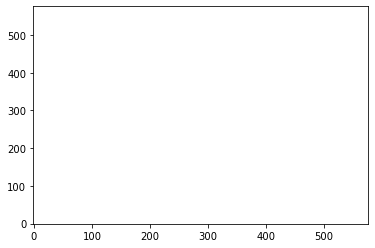

In [36]:
#lets find the max value in a row or column 1D array in order to find where the highest intensity value is. We can then get 85% (I may change this) of that value to look at other high values.
#These other high values can be used to get an idea of where the rings are (as we can get an average of their indices)

# We should try getting the max value of the entire array instead of for each row or column

#for rows
averages=np.array([])
higher_list=np.array([])
valmax=np.amax(img2) #get the actual max value in that row
lowerbound=.85*valmax #we want to see where values above this are. The high intensity values. I chose a 15% threshold.
for a in range(len(img2)): #go through every row and note that img2[0] is the same size as every other row since our image is a rectangle
    for b in range (len(img2[a])): #go through each index of the row
        if img2[a][b]>lowerbound: #if the element is larger than our bound
            higher_list=np.append(higher_list,b) #get the indicies of the larger elements and add them all to a list
    
    averages=np.append(averages,np.mean(higher_list)) #the average of the larger elements (b) to find the center of high intensity spots (the avg index) on a singular row is added to a list of all them (for each row).
    higher_list=np.array([])

#len(averages)) is same length as the row number because each row has one average

print("Approximate horizontal (row) center: "+str(np.nanmean(averages))) #nanmean ignores nan values. nan means not a number. If we just do mean then we get nan.

plt.plot(averages)
    

#for columns
averages=np.array([])
higher_list=np.array([])
valmax=np.amax(img2) #get the actual max value in that column. valmax=img2[[:,c] ,index_max] doesn't work
lowerbound=.85*valmax #we want to see where values above this are. The high intensity values. I chose a 15% threshold.
for c in range(len(img2[0])): #go through every column and note that img2[0] is the size of the number of columns.
    for d in range (len(img2[:,c])): #go through each index of the column
        if img2[:,c][d]>lowerbound: #if the element is larger than our bound
            higher_list=np.append(higher_list,d) #get the indicies of the larger elements and add them all to a list
    
    averages=np.append(averages,np.mean(higher_list)) #the average of the larger elements (b) to find the center of high intensity spots (the avg index) on a singular row is added to a list of all them (for each row).
    higher_list=np.array([])

#len(averages)) is same length as the row number because each row has one average

print("Approximate vertical (column) center: "+str(np.nanmean(averages))) #nanmean ignores nan values. nan means not a number. If we just do mean then we get nan.

plt.plot(averages)

In [ ]:
#The calculated centers can be skewed for images with missing ring parts. The average intensity is ruined when we pass over missing full row or column of the ring because then we just get very low average values.


In [43]:
img2[80] #we should get rid of negatives in our center search method above

array([  120,   128,   153,   135,   132,   123,   130,   129,   126,
         128,   148,   136,   134,   173,   134,   151,   123,   140,
         155,   140,   138,   149,   132,   130,   161,   150,   143,
         156,   149,   148,   155,   147,   151,   167,   137,   164,
         155,   142,   149,   180,   154,   149,   142,   155,   150,
         159,   159,   181,   153,   146,   154,   132,   175,   188,
         124,   158,   171,   187,   170,   153,   164,   176,   158,
         185,   173,   175,   175,   176,   185,   171,   175,   173,
         150,   170,   179,   166,   169,   188,   185,   197,   195,
         188,   190,   195,   187,   191,   191,   218,   177,   197,
         222,   197,   204,   180,   198,   192,   187,   187,   202,
         206,   204,   213,   201,   194,   187,   199,   188,   191,
         215,   200,   198,   199,   194,   188,   211,   201,   210,
         215,   214,   204,   201,   205,   209,   195,   222,   238,
         217,   239,

In [16]:
#colormaps next for clear visual

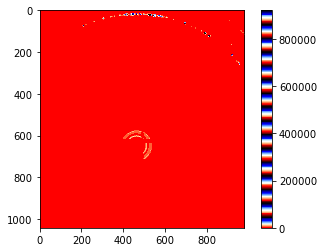

In [17]:
plt.imshow(img2, cmap="flag")
plt.colorbar() #the colorbar on the side has little meaning since the colors aren't dependent on scalar values of the image brightness. As shown on the bar, the same colors are repeated many times, so you can't tell their strength

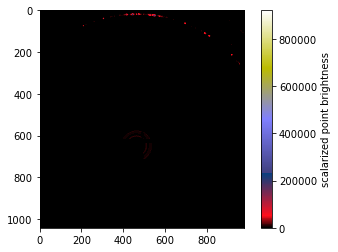

In [18]:
plt.imshow(img2, cmap="gist_stern")
plt.colorbar(label="scalarized point brightness") #tells you the "strength" of the image at this point 